In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [2]:
data = pd.read_csv("/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")
data.head().T

,0,1,2,3,4
job_id,1,2,3,4,5
title,Marketing Intern,Customer Service - Cloud Video Production,Commissioning Machinery Assistant (CMA),Account Executive - Washington DC,Bill Review Manager
location,"US, NY, New York","NZ, , Auckland","US, IA, Wever","US, DC, Washington","US, FL, Fort Worth"
department,Marketing,Success,NaN,Sales,NaN
salary_range,NaN,NaN,NaN,NaN,NaN
company_profile,"We're Food52, and we've created a groundbreaki...","90 Seconds, the worlds Cloud Video Production ...",Valor Services provides Workforce Solutions th...,Our passion for improving quality of life thro...,SpotSource Solutions LLC is a Global Human Cap...
description,"Food52, a fast-growing, James Beard Award-winn...",Organised - Focused - Vibrant - Awesome!Do you...,"Our client, located in Houston, is actively se...",THE COMPANY: ESRI – Environmental Systems Rese...,JOB TITLE: Itemization Review ManagerLOCATION:...
requirements,Experience with content management systems a m...,What we expect from you:Your key responsibilit...,Implement pre-commissioning and commissioning ...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",QUALIFICATIONS:RN license in the State of Texa...
benefits,NaN,What you will get from usThrough being part of...,NaN,Our culture is anything but corporate—we have ...,Full Benefits Offered
telecommuting,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
data.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

<AxesSubplot:>

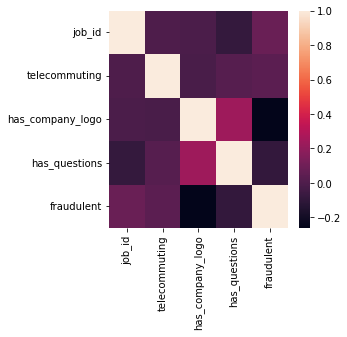

In [7]:
## num features EDA
plt.figure(figsize=(4,4))
sns.heatmap(data.corr())

In [8]:
# text features EDA

for col in ['company_profile', 'description', 'requirements', 'benefits']:
    data[col].fillna("None", inplace=True)

for col in ['company_profile', 'description', 'requirements', 'benefits']:
    print(col, data[col].str.split().apply(lambda a: len(a)).max())

company_profile 885
description 2115
requirements 1645
benefits 694


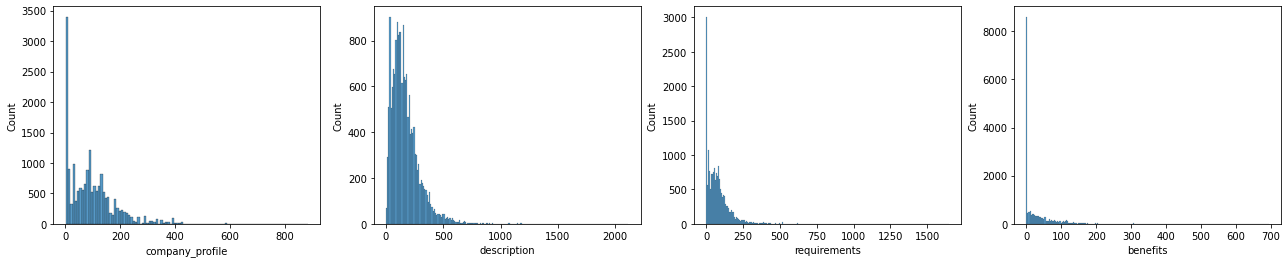

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4,  figsize=(22,4))
for i, col in enumerate(['company_profile', 'description', 'requirements', 'benefits']):
    sns.histplot(data[col].str.split().apply(lambda a: len(a)), ax=axes[i])


In [10]:
# categorical features EDA

for col in ['location', 'department', 'salary_range', 
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']:
    print(col, len(data[col].unique()),"\n", data[col].unique()[:7])
    print()

location 3106 
 ['US, NY, New York' 'NZ, , Auckland' 'US, IA, Wever' 'US, DC, Washington'
 'US, FL, Fort Worth' 'US, MD, ' 'DE, BE, Berlin']

department 1338 
 ['Marketing' 'Success' nan 'Sales' 'ANDROIDPIT' 'HR' ' R&D']

salary_range 875 
 [nan '20000-28000' '100000-120000' '120000-150000' '50000-65000'
 '40000-50000' '60-80']

telecommuting 2 
 [0 1]

has_company_logo 2 
 [1 0]

has_questions 2 
 [0 1]

employment_type 6 
 ['Other' 'Full-time' nan 'Part-time' 'Contract' 'Temporary']

required_experience 8 
 ['Internship' 'Not Applicable' nan 'Mid-Senior level' 'Associate'
 'Entry level' 'Executive']

required_education 14 
 [nan "Bachelor's Degree" "Master's Degree" 'High School or equivalent'
 'Unspecified' 'Some College Coursework Completed' 'Vocational']

industry 132 
 [nan 'Marketing and Advertising' 'Computer Software'
 'Hospital & Health Care' 'Online Media'
 'Information Technology and Services' 'Financial Services']

function 38 
 ['Marketing' 'Customer Service' nan 'Sales' 

In [11]:
data.fraudulent.sum()

866

In [12]:
# fraudulent destribution

for col in ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
     'required_experience', 'required_education', 'function']:
    print(data[[col, 'fraudulent']].groupby(col).sum()/ data[[col, 'fraudulent']].groupby(col).count())
    print()

               fraudulent
telecommuting            
0                0.046865
1                0.083442

                  fraudulent
has_company_logo            
0                   0.159290
1                   0.019902

               fraudulent
has_questions            
0                0.067782
1                0.028435

                 fraudulent
employment_type            
Contract           0.028871
Full-time          0.042169
Other              0.066079
Part-time          0.092848
Temporary          0.008299

                     fraudulent
required_experience            
Associate              0.018285
Director               0.043702
Entry level            0.066370
Executive              0.070922
Internship             0.026247
Mid-Senior level       0.029667
Not Applicable         0.053763

                                   fraudulent
required_education                           
Associate Degree                     0.021898
Bachelor's Degree                    0.019436
Cer

# Train/Test Split

In [13]:
model_features = [
       'title',  
       'company_profile', 
       'description', 
       'requirements', 
       #'benefits',
       'telecommuting',
       'has_company_logo',
       'has_questions',
       #'employment_type',
       #'required_experience',
       #'required_education',
       #'industry',
       #'function'
        ]

In [14]:
from sklearn.model_selection import train_test_split
data_y = data.fraudulent
data_x = data[model_features]

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.15, stratify=data_y,random_state=42)
#df_train_samples= df_train_samples.reset_index(drop=True)
print(x_train.shape)

(2682, 7)


# Text Model

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
#from torchvision import datasets
from torchvision.transforms import transforms

In [16]:
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [17]:
from transformers import RobertaConfig

# Initializing a RoBERTa configuration
configuration = RobertaConfig()

class_num = 2
max_length = 510

configuration.num_labels = class_num

In [18]:
from transformers import AdamW, BertConfig
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("roberta-base", max_length = max_length)

model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = class_num, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    #output_attentions = False, # Whether the model returns attentions weights.
    #output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.

model.cuda()


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [19]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

labels = data_y                                                                   
       
# For every sentence...
for item in data_x[['company_profile', 'description', 'requirements']].values:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    company_profile = " ".join(item[0].split()[:130])
    description = " ".join(item[1].split()[:240])    
    requirements = " ".join(item[2].split()[:130])
    sent = company_profile + '[SEP]' + description + '[SEP]' + requirements
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_length,           # Pad & truncate all sentences.
                        truncation=True,
                        #pad_to_max_length = True,
                        padding='max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Token IDs:', input_ids[0])

Token IDs: tensor([    0,   170,   214,  3652,  4429,     6,     8,    52,   348,  1412,
           10, 18910,     8,  2354,    12,  5189,  6836,  1082,     4,   166,
          323,     6,  4686,     6,     8,  3379,   184, 26953,     6,     8,
          492,   106,   960,    51,   240,    11,    65,   317,     4,   170,
           33,    10,   299,  8161,     6,   265,     6,     8,  4675,   165,
            4,   166,   214,  2061,    15,   634,   806,     7,   465,    92,
            8,   357,  1319,     7,  4686,    82,   198,    49,  2167,   689,
         3168,     6,     8,     7,   904,   106, 11415,     6,  2200, 23132,
          335,    59,   689,     8,  6836,     4,   166,  5696,     5,   144,
         5918,   184, 26953,     8, 17233,    11,     5,   247,   131,    52,
           67, 10732,   157,    12,  6421,  5197,   101,  8782,  8324,  3644,
            6,   272, 16541,  4774,   221,  3967,  4610,     6,     8,  6937,
        11392,     4,   178,    52,    33,  8670,    

In [20]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

16,092 training samples
1,788 validation samples


In [21]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [22]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [23]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [24]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [25]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [26]:
import random

from sklearn.metrics import classification_report

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

batch_loss = 0

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        
        #print(batch[0].shape, batch[1].shape, batch[2].shape)
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        #print(batch[2])
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        res = model(b_input_ids, token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss = res['loss']
        logits = res['logits']

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()
        batch_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()
        
        # batch loss indication
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  loss:  {:}.'.format(step, batch_loss))
            batch_loss = 0

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    pred_all = []
    label_all = []
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            res = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = res['loss']
        logits = res['logits']

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        
        
        pred_all.extend(np.argmax(logits, axis=1).flatten())
        label_all.extend(label_ids.flatten())
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Classification report
    print(classification_report(pred_all, label_all))
    
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch   100  of  1,006.    Elapsed: 0:01:26.
  Batch   100  loss:  20.684445429593325.
  Batch   200  of  1,006.    Elapsed: 0:02:50.
  Batch   200  loss:  17.88337034918368.
  Batch   300  of  1,006.    Elapsed: 0:04:15.
  Batch   300  loss:  13.739302825648338.
  Batch   400  of  1,006.    Elapsed: 0:05:39.
  Batch   400  loss:  10.96077443449758.
  Batch   500  of  1,006.    Elapsed: 0:07:04.
  Batch   500  loss:  12.098407592973672.
  Batch   600  of  1,006.    Elapsed: 0:08:29.
  Batch   600  loss:  10.14097091020085.
  Batch   700  of  1,006.    Elapsed: 0:09:53.
  Batch   700  loss:  11.100944448029622.
  Batch   800  of  1,006.    Elapsed: 0:11:18.
  Batch   800  loss:  9.787478634854779.
  Batch   900  of  1,006.    Elapsed: 0:12:42.
  Batch   900  loss:  10.712617542594671.
  Batch 1,000  of  1,006.    Elapsed: 0:14:07.
  Batch 1,000  loss:  7.707656362035777.

  Average training loss: 0.12
  Training epcoh took: 0:14:12

Running V

In [27]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.12,0.07,0.97,0:14:12,0:00:30
2,0.06,0.04,0.99,0:14:11,0:00:30
3,0.03,0.07,0.99,0:14:11,0:00:30


In [28]:
#tokenizer.save_pretrained("./models/tokenizer/")
#model.save_pretrained("./models/model/")